# Assignment-MLR (50-Startups Profit Prediction)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [23]:
ls

 Volume in drive C is OS
 Volume Serial Number is 267A-0770

 Directory of C:\Users\HP\Ass-5 MLR

04-07-2022  01:49    <DIR>          .
04-07-2022  01:49    <DIR>          ..
04-07-2022  01:31    <DIR>          .ipynb_checkpoints
04-07-2022  01:30             2,436 50_Startups.csv
04-07-2022  01:48             2,438 50_Startups-1.csv
04-07-2022  01:43            99,288 Ass-5 MLR.ipynb
04-07-2022  01:30           224,041 ToyotaCorolla.csv
               4 File(s)        328,203 bytes
               3 Dir(s)  53,013,045,248 bytes free


In [24]:
stup = pd.read_csv('50_Startups-1.csv')

In [25]:
stup.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
stup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [27]:
stup.corr()

,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


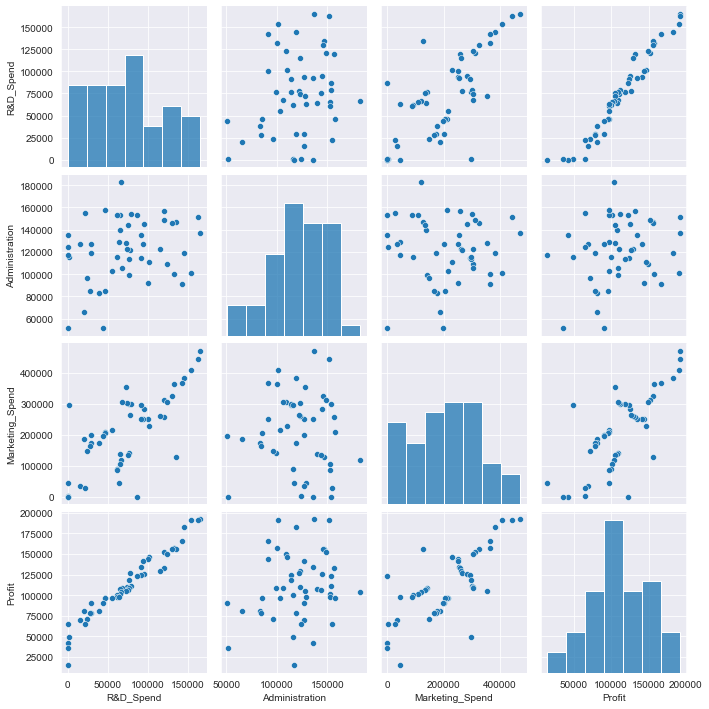

In [28]:
sns.set_style(style="darkgrid")
sns.pairplot(stup)

In [87]:
stup1=stup.rename({'R&D_Spend':'R_D','Administration':'ADMS','Marketing_Spend':'MS'},axis=1)
stup1.head()

,R_D,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Preparing Model

In [40]:
import statsmodels.formula.api as smf 
first_model = smf.ols('Profit~R_D+ADMS+MS',data = stup1).fit()

In [41]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        01:59:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SLR models for high P-Values features

In [47]:
slr_1 = smf.ols("Profit~ADMS",data = stup1).fit()
print(slr_1.tvalues,slr_1.pvalues)
slr_1.summary()

Intercept    3.040044
ADMS         1.419493
dtype: float64 Intercept    0.003824
ADMS         0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 04 Jul 2022   Prob (F-statistic):              0.162
Time:                        02:08:58   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADMS           0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
slr_2 = smf.ols("Profit~MS",data = stup1).fit()
print(slr_2.tvalues,slr_2.pvalues)
slr_2.summary()

Intercept    7.808356
MS           7.802657
dtype: float64 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           4.38e-10
Time:                        02:08:34   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Data are significant and can be used
mlr_1 = smf.ols("Profit~ADMS+MS",data = stup1).fit()
mlr_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           2.50e-10
Time:                        02:12:45   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADMS           0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model validation VIF

In [50]:
# VIF = 1/(1-Rsquare) for all independent variables

rsq_1=smf.ols("R_D~ADMS+MS",data=stup1).fit().rsquared
vif_1=1/(1-rsq_1)

rsq_2=smf.ols("ADMS~R_D+MS",data=stup1).fit().rsquared
vif_2=1/(1-rsq_2)

rsq_3=smf.ols("MS~R_D+ADMS",data=stup1).fit().rsquared
vif_3=1/(1-rsq_3)

# Putting the values in Dataframe format
data={'Variables':['R_D','ADMS','MS'],'Vif':[vif_1,vif_2,vif_3]}
Vif_dataframe=pd.DataFrame(data)
Vif_dataframe

,Variables,Vif
0,R_D,2.468903
1,ADMS,1.175091
2,MS,2.326773


all vif are less than 20 so we are ready to go to next step

# Normality Q-Q plot

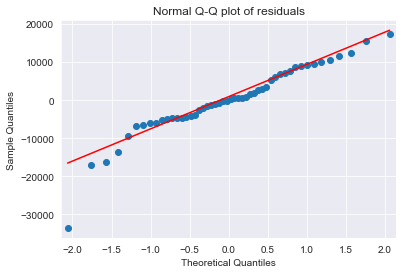

In [53]:
import statsmodels.api as sm
sm.qqplot(first_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Homoscedasticity Residual Plot

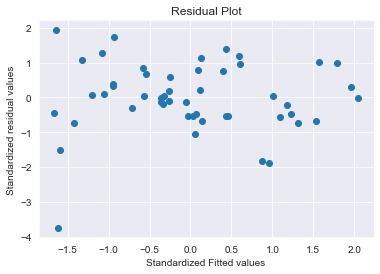

In [55]:
def standard_val(vals) : return (vals-vals.mean())/vals.std()
plt.scatter(standard_val(first_model.fittedvalues),
            standard_val(first_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressors

eval_env: 1


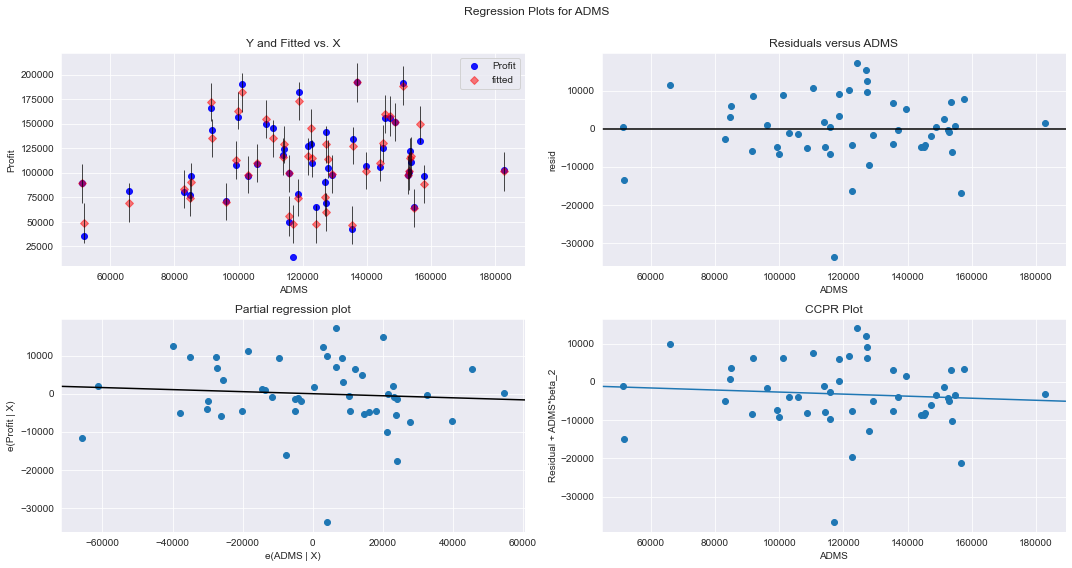

In [57]:
fig = plt.figure(figsize=(15,8)) #size of the plot
fig = sm.graphics.plot_regress_exog(first_model, "ADMS", fig=fig) #exog for 4 plots together
plt.show()

eval_env: 1


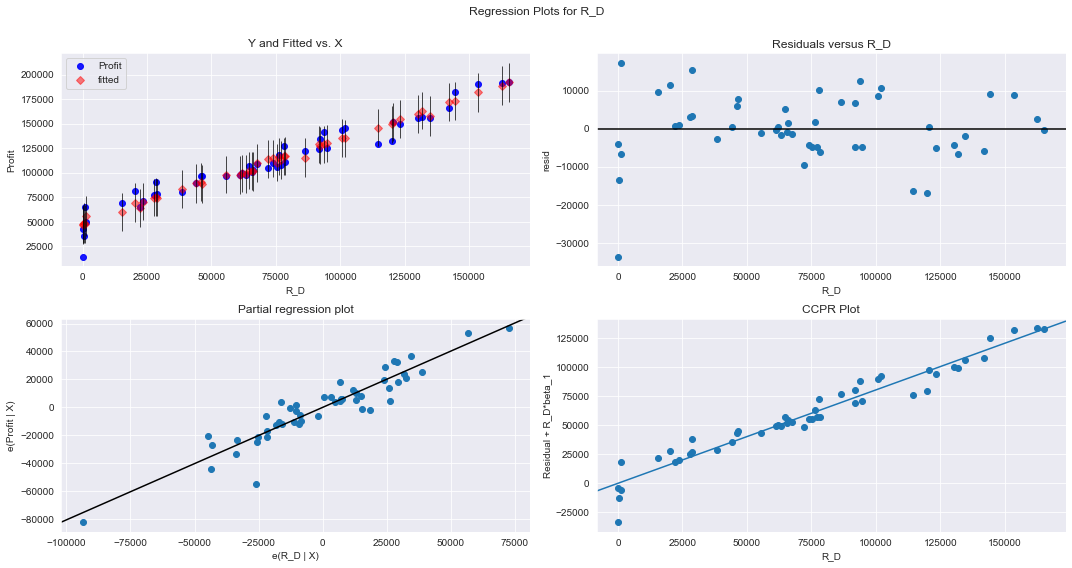

In [58]:
fig = plt.figure(figsize=(15,8)) #size of the plot
fig = sm.graphics.plot_regress_exog(first_model, "R_D", fig=fig) #exog for 4 plots together
plt.show()

eval_env: 1


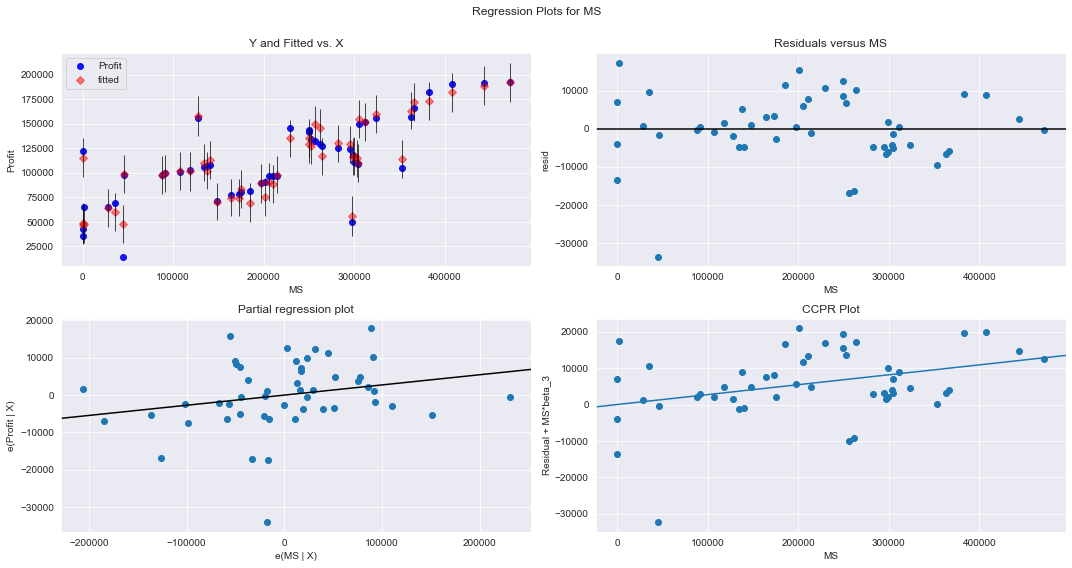

In [59]:
fig = plt.figure(figsize=(15,8)) #size of the plot
fig = sm.graphics.plot_regress_exog(first_model, "MS", fig=fig) #exog for 4 plots together
plt.show()

# Outlier Detection

COOKS Distance

In [61]:
model_influence = first_model.get_influence()
(c,_) = model_influence.cooks_distance

In [66]:
K=3 
N=50
3*(K+1)/N 

0.24

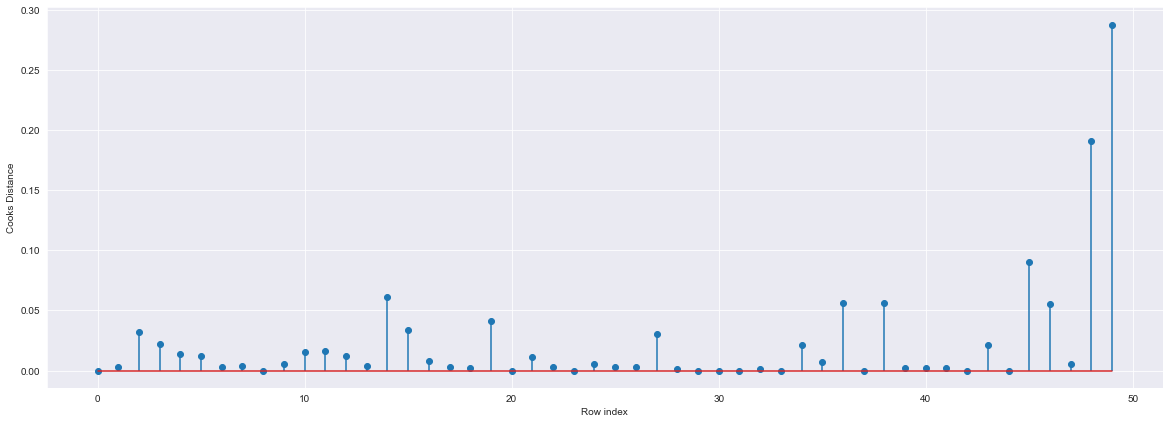

In [67]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(stup1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [85]:
np.where(c>0.1851)

(array([48, 49], dtype=int64),)

In [89]:
stup2=stup1.drop(stup1.index[[48,49]],axis=0).reset_index(drop=True)
stup2

,R_D,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Final Model

In [90]:
final_model=smf.ols("Profit~R_D+ADMS+MS",data=stup2).fit()   

In [91]:
final_model.rsquared , final_model.aic

(0.9626766170294073, 994.6690439260116)

In [92]:
first_model.rsquared , first_model.aic

(0.9507459940683246, 1058.7714985998055)

Rsquared is increased in the Final model from 95.07% to 96.26%

In [93]:
model_influence_V = final_model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

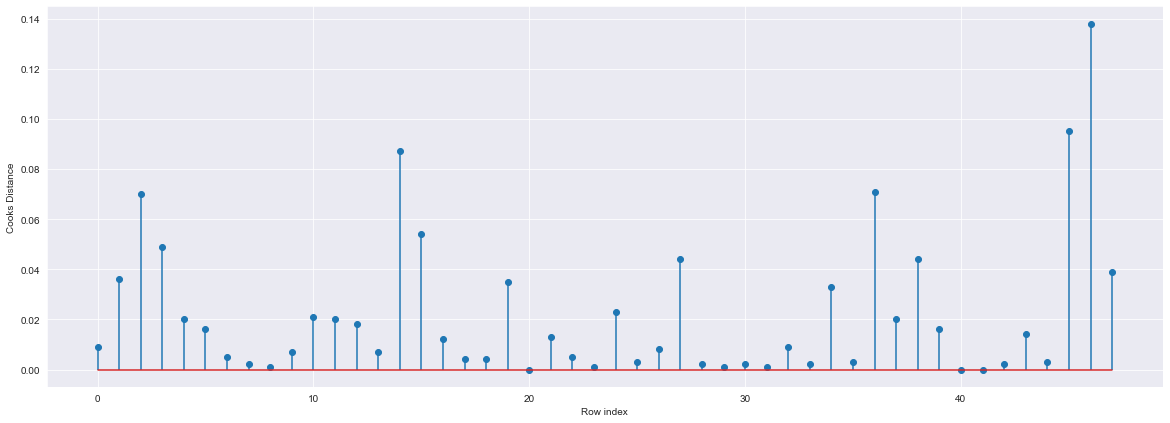

In [95]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(stup2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [96]:
np.where(c_V>0.2)

(array([], dtype=int64),)

No Outliers in our Final Model

# Table for R-squared values

In [100]:
table={'Models':['First Model','Final Model'],'Rsquared':[first_model.rsquared,final_model.rsquared]}
table=pd.DataFrame(table)
table

,Models,Rsquared
0,First Model,0.950746
1,Final Model,0.962677
